### **Exploratory Data Analysis (EDA) - Wine Quality**

<img src="https://images.pexels.com/photos/3756623/pexels-photo-3756623.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1" alt="Imagen de vinos" style="width:200px; height:auto; object-fit:cover;">



#### **Objective**
This notebook presents an Exploratory Data Analysis (EDA) of a dataset consisting of physicochemical properties and quality (sensory) data for Portuguese "vinho verde" white and red wines samples.

The objective is to understand the data and to identify correlations between variables before applying a machine learning model to predict wine quality based on physicochemical characteristics.

http://www3.dsi.uminho.pt/pcortez/wine/


#### Input Variables - Physicochemical analysis 

1. **Fixed Acidity**: The concentration of non-volatile acids, primarily tartaric, malic, and citric acids, contributing to the wine's tartness and stability.

2. **Volatile Acidity**: The amount of acetic acid and other volatile acids present, which can affect the aroma and spoil the wine if too high.

3. **Citric Acid**: A minor acid in wine that can add freshness and enhance the fruity flavors.

4. **Residual Sugar**: The sugar remaining after fermentation, influencing sweetness and body.

5. **Chlorides**: The chloride ion concentration, which can affect the taste and stability of the wine.

6. **Free Sulfur Dioxide**: The portion of sulfur dioxide that is not bound to other compounds, acting as an antimicrobial and antioxidant.

7. **Total Sulfur Dioxide**: The total amount of sulfur dioxide, both free and bound, used as a preservative.

8. **Density**: The mass per unit volume of the wine, related to the alcohol and sugar content.

9. **pH**: The measure of the acidity or basicity of the wine, affecting taste, color, and microbial stability.

10. **Sulphates**: Compounds that can contribute to wine stability and preservation, also influencing mouthfeel.

11. **Alcohol**: The ethanol content resulting from fermentation, affecting the wine's body, war
12. **Type**: Categorical, Red or White Wine.
#### Output Variable - Sensory data
12. **Quality**: A sensory-based score ranging from 0 to 10, reflecting the overall perceived quality of the wine based on taste, aroma, balanoverall enjoyment.mth, and preservation.

#### **1. Importing libraries**

All necessary libraries are imported

In [1]:
# Import all necessary libraries
# !pip install pandas --user
# !pip install seaborn --user
# !pip install matplotlib --user
# !pip install missingno --user
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


#### **2. Data Cleaning and Data Description**

In this section, exploratory data analysis will be conducted. This includes examining data types, handling missing values, identifying duplicates, calculating means, and describing relationships between variables.

In [29]:
# Reading data
df = pd.read_csv("WineQuality.csv")

In [30]:
# Showing first rows of the DataFrame
df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
1,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
2,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
3,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine
4,0,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8,White Wine


In [31]:
# Let's look at the dimensions of the data
print(f'Data contain {df.shape[0]} records and {df.shape[1]} columns.')

Data contain 32485 records and 14 columns.


In [32]:
# Let's see data types
df.dtypes

id                        int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Type                     object
dtype: object

Data contains 1 categorical column (type) and 13 numerical columns

##### **2.1. Missing values**

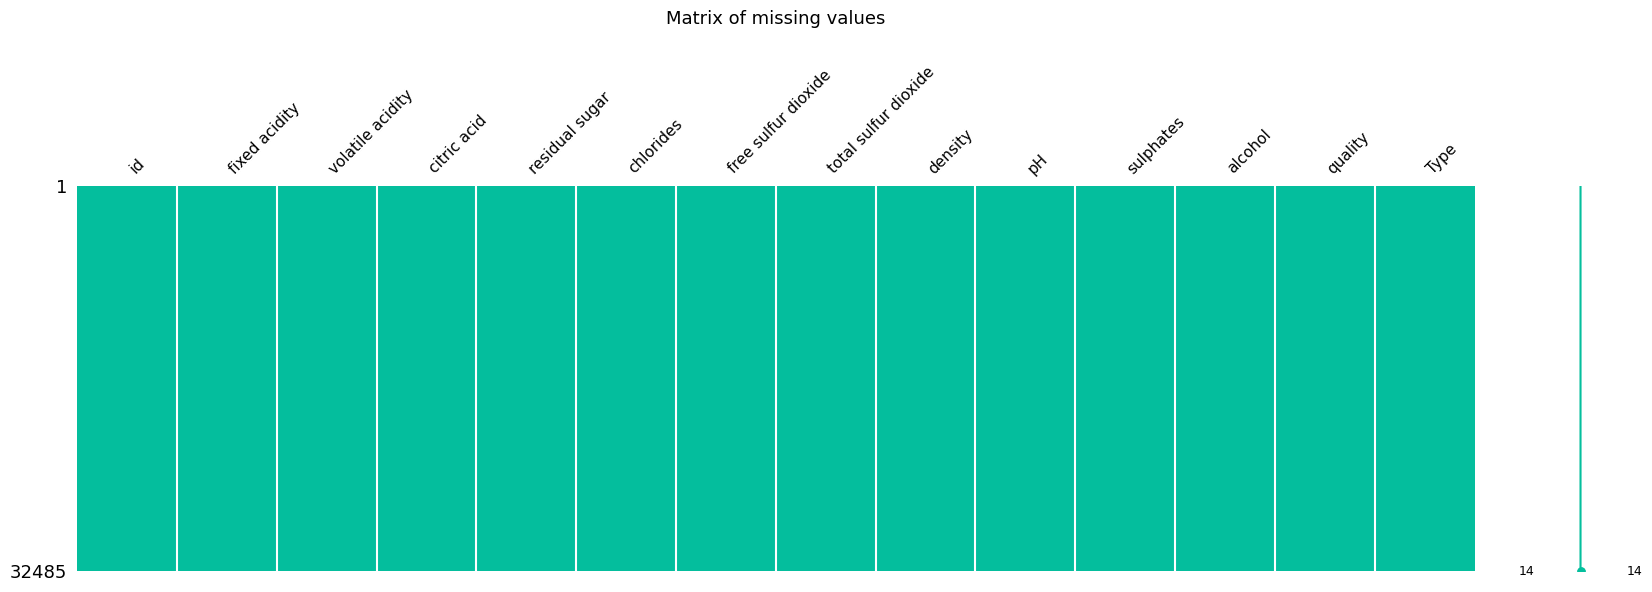

In [33]:
# Let´s build a matrix of missing values
msno.matrix(df, fontsize=11, color=(0.0157, 0.749, 0.6157),figsize=(20, 5))
plt.title('Matrix of missing values', y=1.4, fontsize=13)
plt.show()

There are no missing values in the DataSet

#### **2.2. Duplicated data**

In [34]:
# Let's check for duplicate rows

duplicates= df.duplicated()
num_duplicates = sum(duplicates)
print(f"Number of duplicated rows: {num_duplicates}")


Number of duplicated rows: 26036


In [35]:
# Let's remove duplicates

num_duplicates = df.shape[0] - df.drop_duplicates(keep='first').shape[0]
df = df.drop_duplicates()
print(f"Number of duplicate rows removed: {num_duplicates}")

Number of duplicate rows removed: 26036


In [36]:
# Let´s check how many wines are left in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6449 entries, 0 to 32482
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6449 non-null   int64  
 1   fixed acidity         6449 non-null   float64
 2   volatile acidity      6449 non-null   float64
 3   citric acid           6449 non-null   float64
 4   residual sugar        6449 non-null   float64
 5   chlorides             6449 non-null   float64
 6   free sulfur dioxide   6449 non-null   float64
 7   total sulfur dioxide  6449 non-null   float64
 8   density               6449 non-null   float64
 9   pH                    6449 non-null   float64
 10  sulphates             6449 non-null   float64
 11  alcohol               6449 non-null   float64
 12  quality               6449 non-null   int64  
 13  Type                  6449 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 755.7+ KB


There are now 6449 registers in theDataSet

In [37]:
# Let's delete the id column for later analysis

del df["id"]

The DataSet contains 6,449 different wines, each described by 12 physicochemical characteristics. 

Wines are presented in two categories: white and red.

#### **3. Data Analysis**

##### **3.1. Categorical Variables**

Data contains only one categorical variable, Type of wine

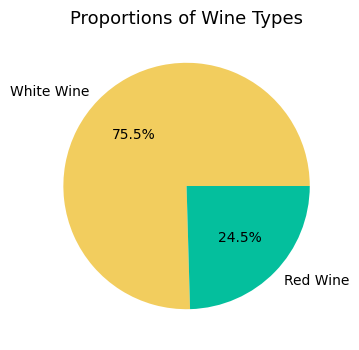

In [13]:
# Let´s see proportion of White and Red wines

plt.figure(figsize=(4, 4))
counts = df["Type"].value_counts()

colors = ['#F2CD5E','#04BF9D']
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Proportions of Wine Types', fontsize=13)
plt.show()

The dataset predominantly consists of White wines, comprising 75.5% of the samples.

##### **3.2. Numerical Variables**

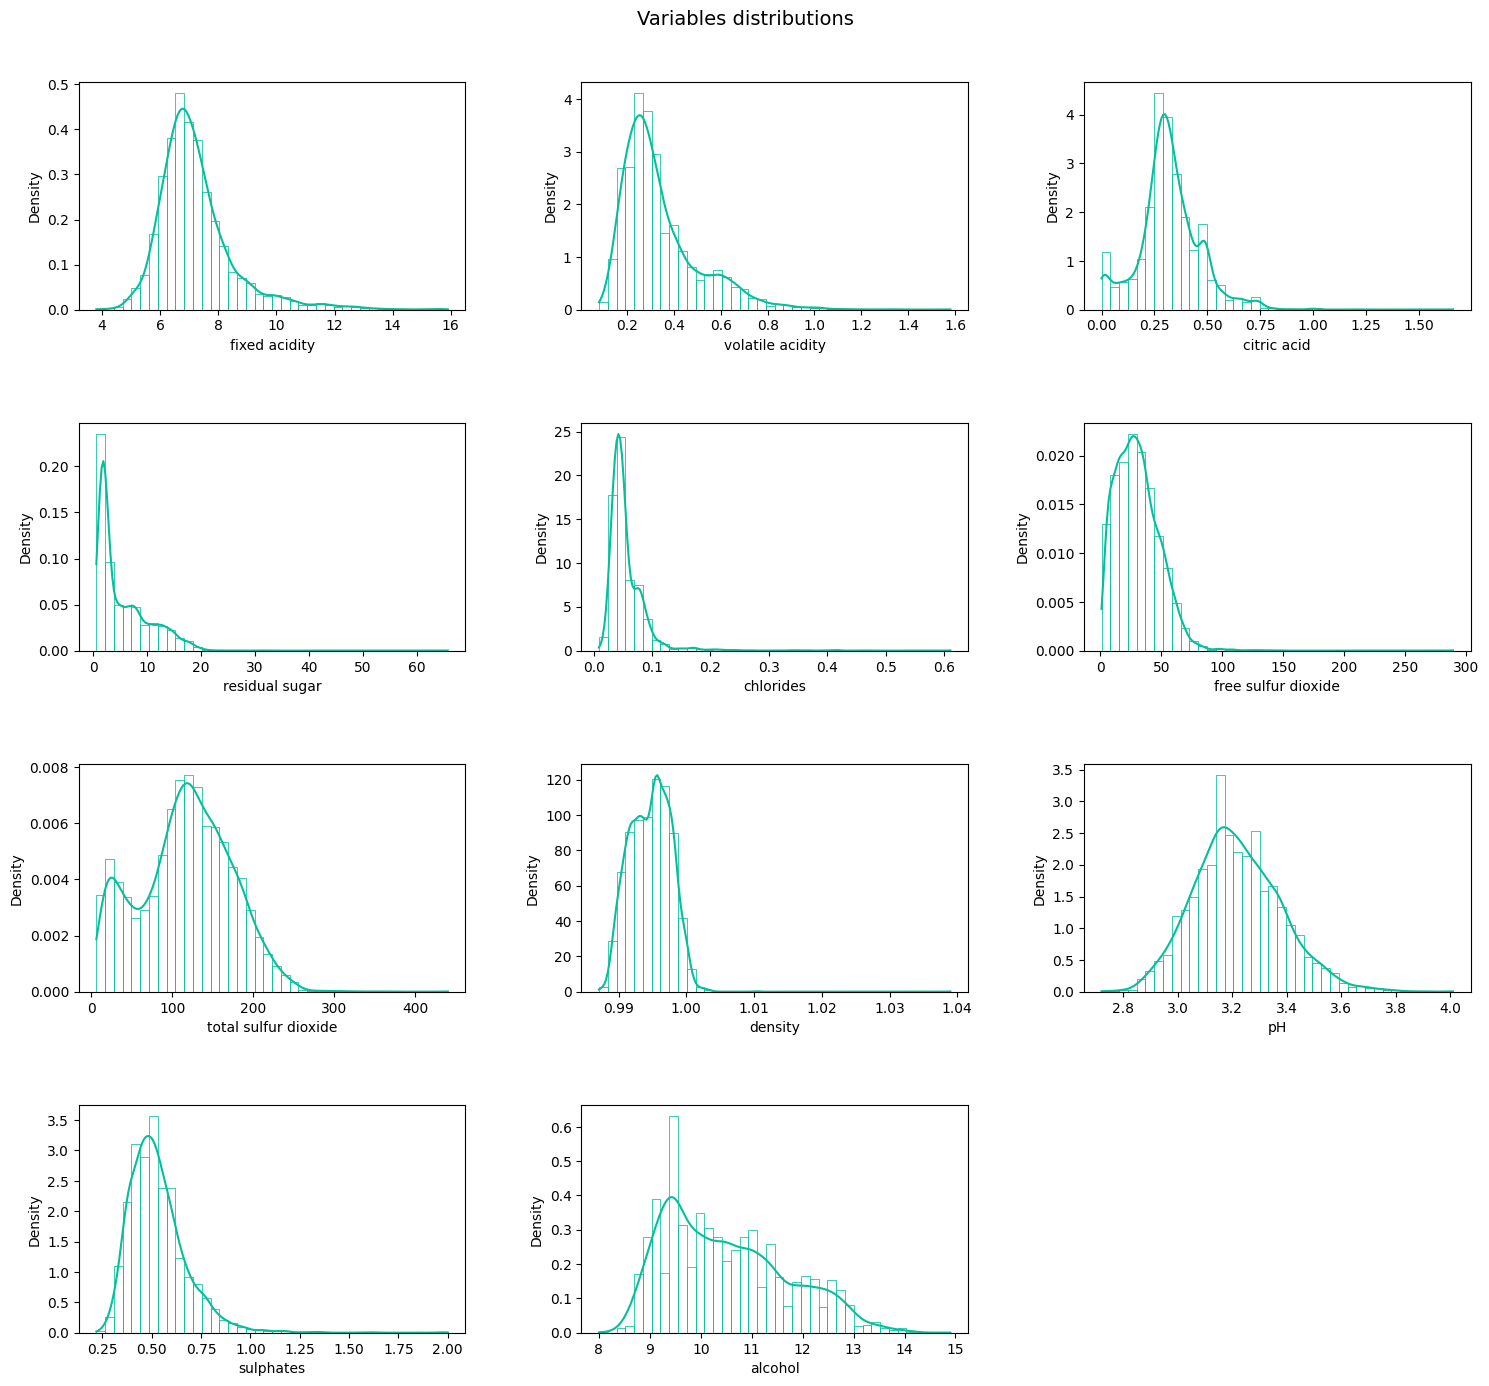

In [14]:
# Let´s see distributions of numerical variables 

plt.figure(figsize = (15, 20))
plt.suptitle("Variables distributions", y=1.01, fontsize=14)

# Dropping Quality and Type column
df_filtered = df.drop(['quality', 'Type'], axis=1)  

n_cols = len(df_filtered.columns)
n_rows = (n_cols + 1) // 2  
for i, j in enumerate(df_filtered.columns):
    plt.subplot(n_rows, 3, i+1)
    sns.histplot(x = j, data = df_filtered, 
                stat = 'density',  kde = True, bins = 40,
                color = '#04BF9D', fill = False)
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

Many variables exhibit skewed distributions (especially in volatile acidity, residual sugar, and sulfur dioxide). It might be useful to transform some of these variables to normalize the distributions and improve predictive models.

It is important to calculate the correlations between the physicochemical variables and wine quality. This will help identify which factors have the greatest impact on the perception of quality.

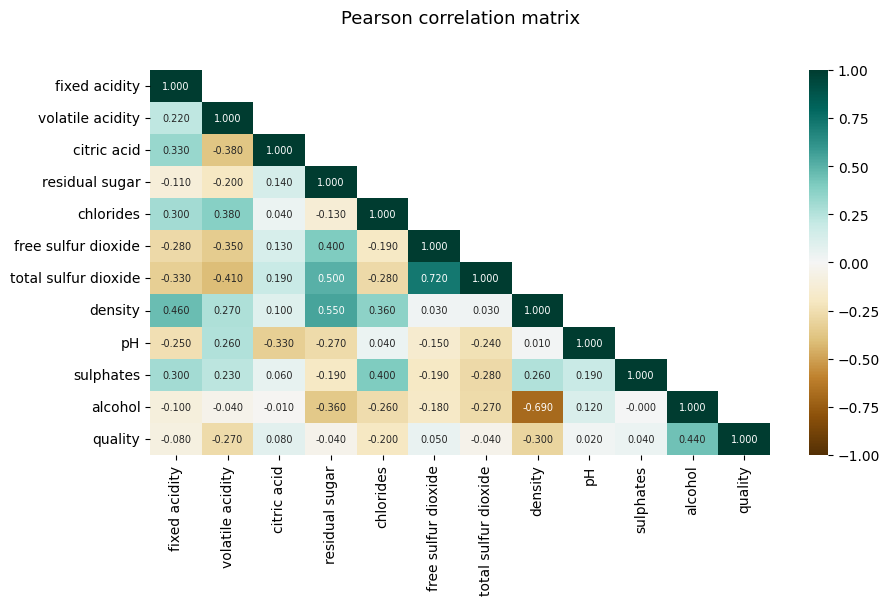

In [38]:
# Let´s look for correalations between numerical variables

df_continuous_vars = df.select_dtypes(include=[np.number])

# Pearson correlation matrix
corr = df_continuous_vars.corr().round(2)

f, ax = plt.subplots(figsize=(10, 5))
# Create a mask to hide values above the diagonal
mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)
# Create the heatmap
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt=".3f", annot_kws={"size": 7}, cmap='BrBG', mask=mask)

plt.title ("Pearson correlation matrix", y=1.1, fontsize=13)
plt.show()



Quality is not highly correlated with any variable.

Overall, there is a low correlation between most numerical variables. Notable exceptions include:
- Free sulfur dioxide and total sulfur dioxide
- Alcohol and density
- Density and residual sugar
  
This is expected, given the dataset includes both white and red wines, which have distinct physicochemical profiles, as demonstrated below.

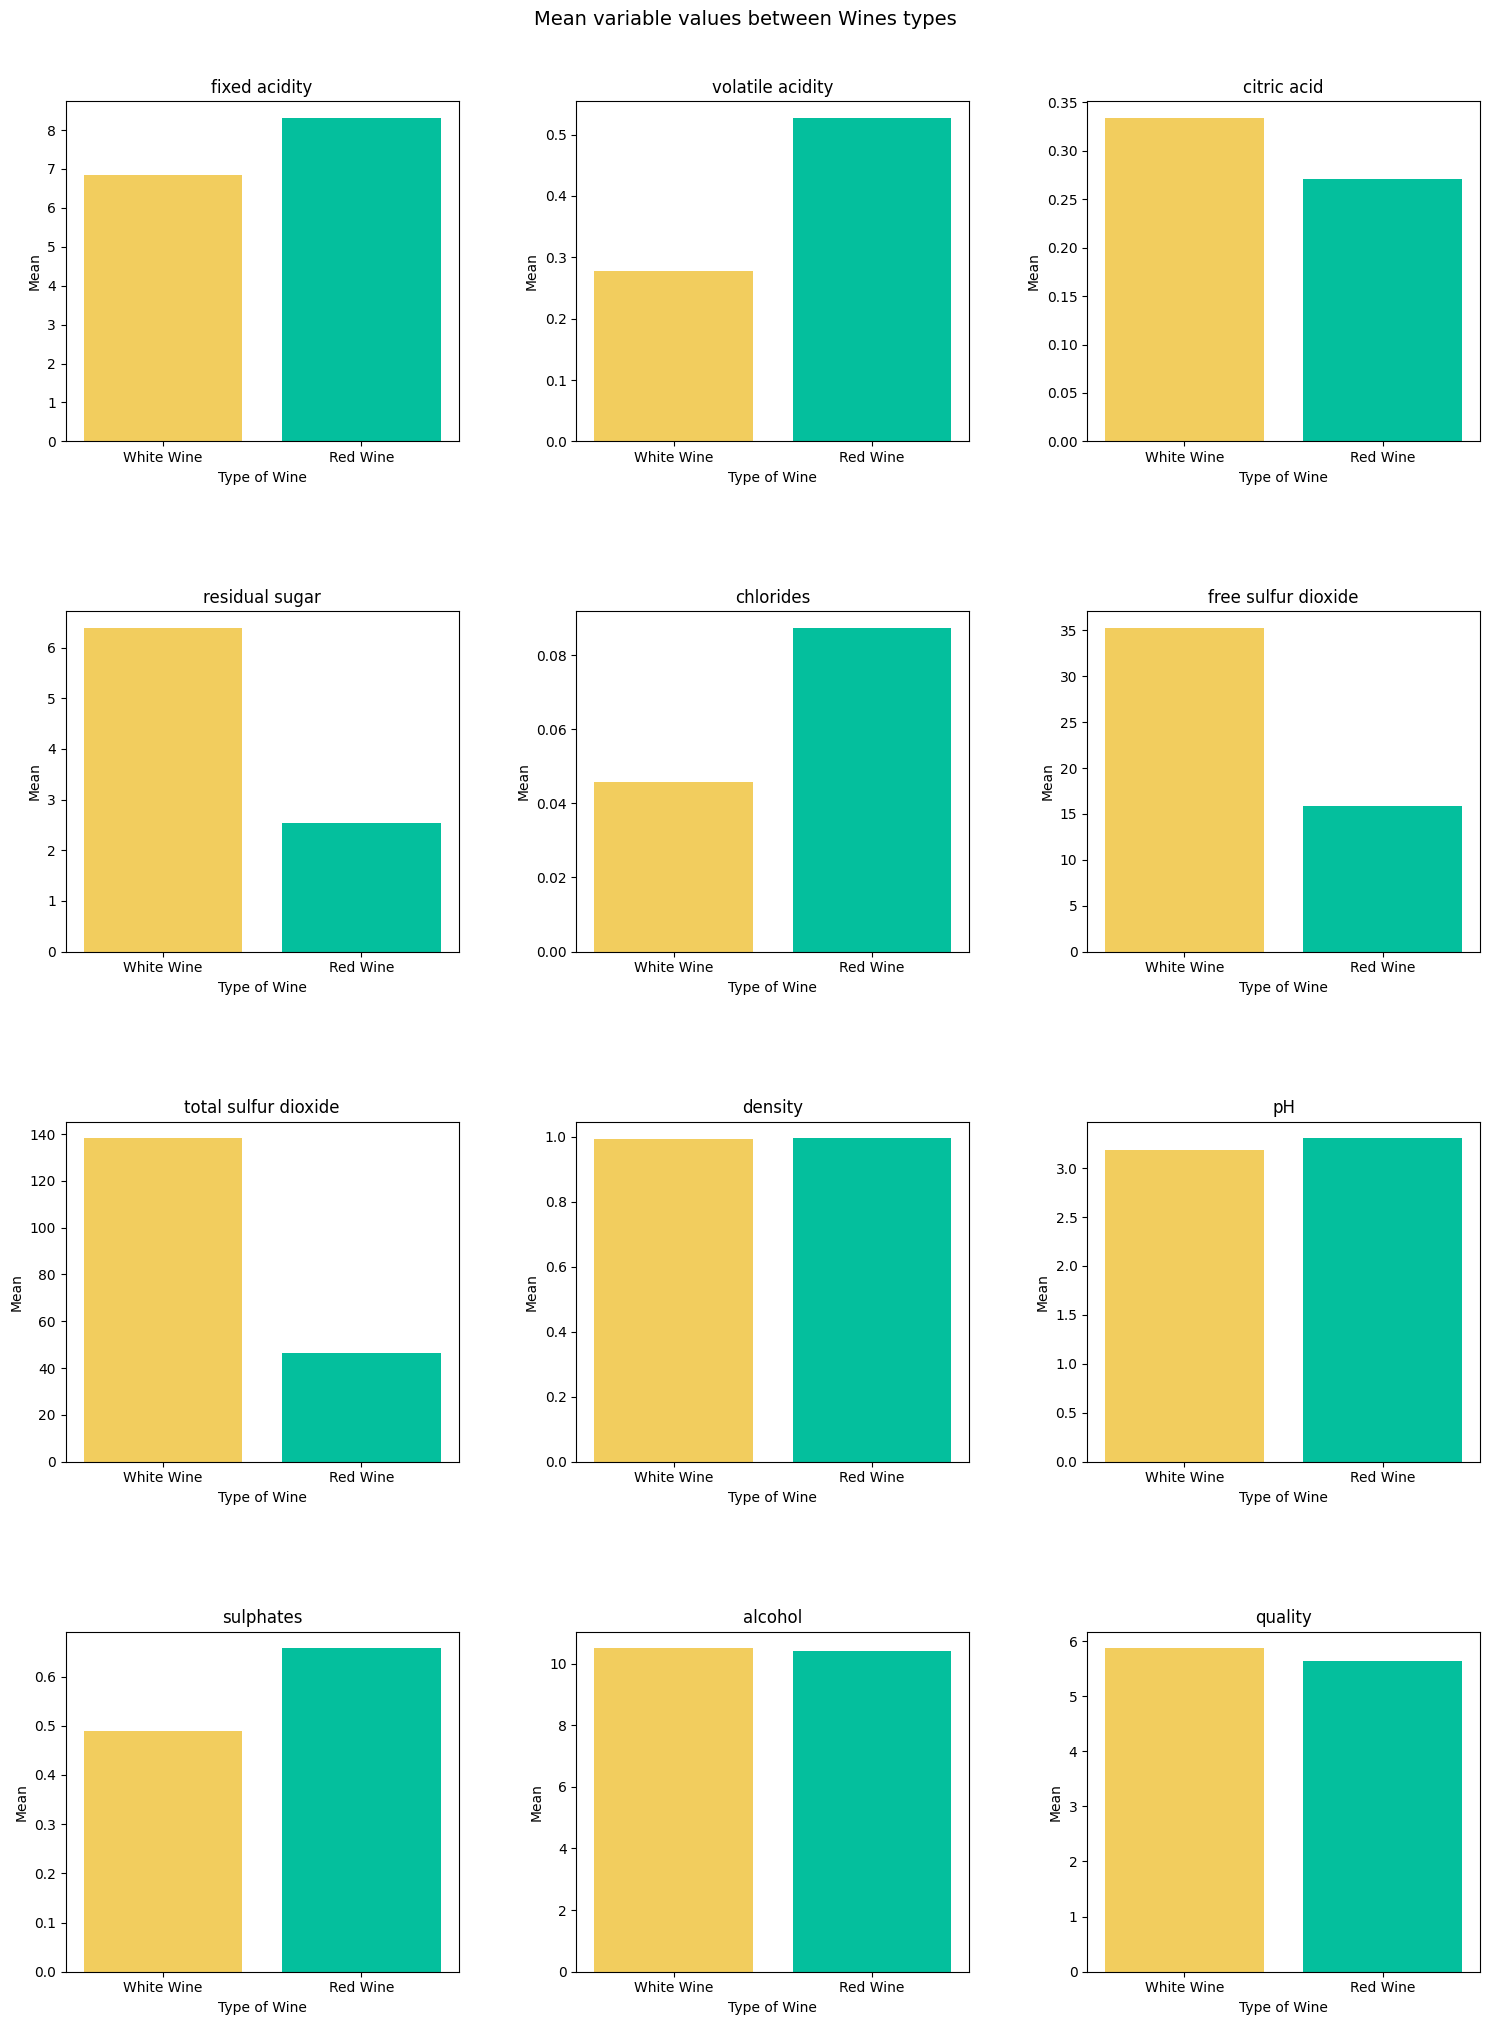

In [16]:
# Let´s graph the mean of each characteristic for each type of wine

promedios_blancos = df[df['Type'] == 'White Wine'].select_dtypes(include=[int, float]).mean()
promedios_tintos = df[df['Type'] == 'Red Wine'].select_dtypes(include=[int, float]).mean()

# Define the colors for each type of wine
colors = ['#F2CD5E','#04BF9D']

# Create a figure with a 3-column grid
fig, axs = plt.subplots(nrows=(len(promedios_blancos) + 2) // 3, ncols=3, figsize=(15, 20))

# Create a chart for each value in the series
for i, (name, val) in enumerate(promedios_blancos.items()):
    row = i // 3
    col_idx = i % 3
    axs[row, col_idx].bar(['White Wine', 'Red Wine'], [val, promedios_tintos[name]], color=[colors[0], colors[1]])
    axs[row, col_idx].set_xlabel('Type of Wine')
    axs[row, col_idx].set_ylabel('Mean')
    axs[row, col_idx].set_title(f'{name}')

# Hide the empty axes
for ax in axs.flat:
    if not ax.has_data():
        ax.axis('off')

# Display the grid of charts
fig.suptitle("Mean variable values between Wines types", y=1.01, fontsize=14)
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.show()

Substantial differences in mean values of physicochemical properties are observed between red and white wines. Key characteristics include:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorids
- free sulphure dioxid
- sulphure dioxid
- sulphates

Let's explore correlations for white wines on one side and red wines on the other.


**3.2.1. White wines correlations**

In [17]:
# Let´s create a DataSubset with only White Wines

df_white = df[df["Type"] == "White Wine"]

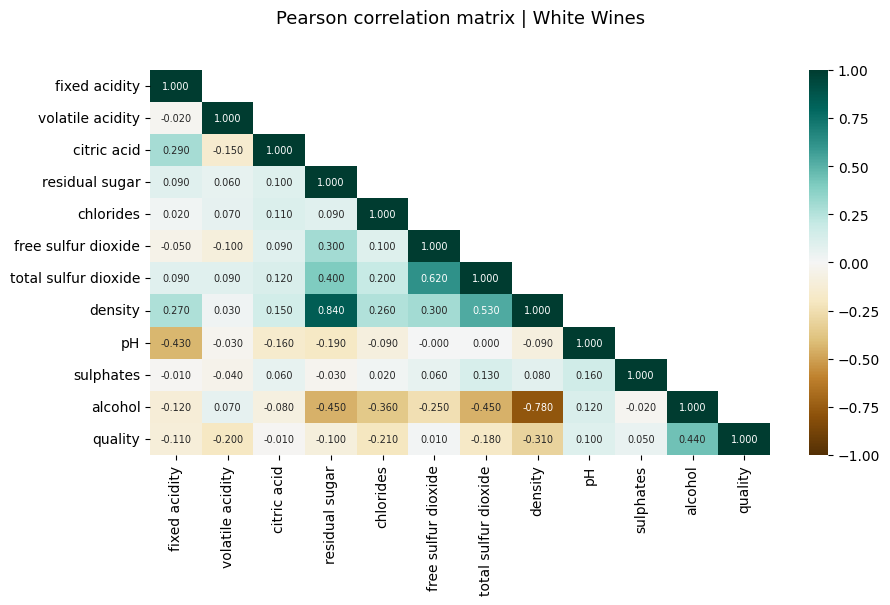

In [39]:
# Let's search for correlations between variables

df_white_continuous_vars = df_white.select_dtypes(include=[np.number])

# Pearson´s correlation matrix
corr_white = df_white_continuous_vars.corr().round(2)

fig,ax = plt.subplots(figsize=(10, 5))
# Create a mask to hide values above the diagonal
mask = np.triu(np.ones_like(corr_white, dtype=bool))
np.fill_diagonal(mask, False)
# Create the heatmap
sns.heatmap(corr_white, vmin=-1, vmax=1, annot=True, fmt=".3f", annot_kws={"size": 7}, cmap='BrBG', mask=mask)

plt.title ("Pearson correlation matrix | White Wines",y=1.1, fontsize=13)
plt.show()

White Wines:

Positive correlations:
- Density and residual sugar
- Total sulfur dioxide and free sulfur dioxide
- Density and total sulfur dioxide

Negative correlation:
- Alcohol and density

**3.2.2. Red Wines correlations**

In [19]:
# Let´s create a DataSubset with only Red Wines

df_red = df[df["Type"] == "Red Wine"]

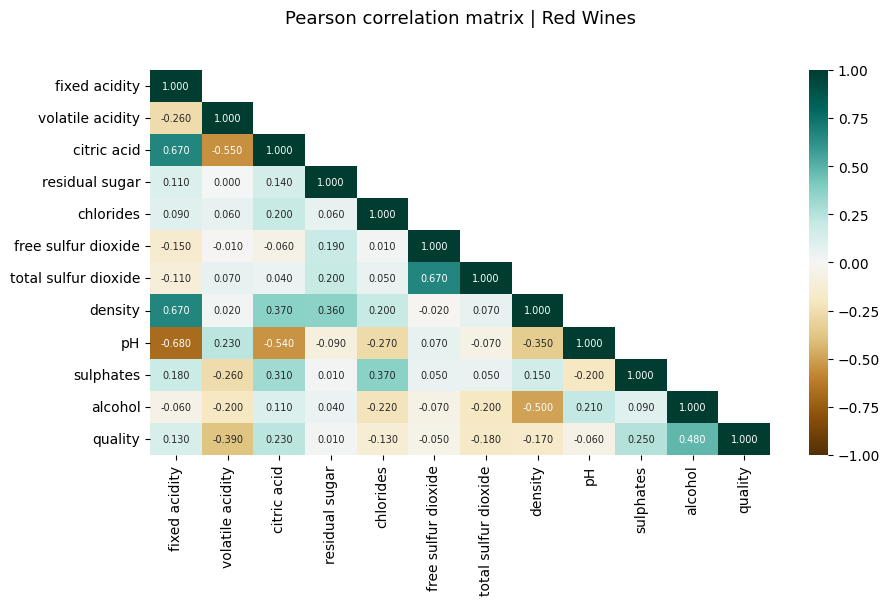

In [40]:
# Let's search for correlations between variables
df_red_continuous_vars = df_red.select_dtypes(include=[np.number])

# Pearson´s correlation matrix
corr_red = df_red_continuous_vars.corr().round(2)

fig,ax = plt.subplots(figsize=(10, 5))
# Create a mask to hide values above the diagonal
mask = np.triu(np.ones_like(corr_white, dtype=bool))
np.fill_diagonal(mask, False)
# Create the heatmap
sns.heatmap(corr_red, vmin=-1, vmax=1, annot=True, fmt=".3f", annot_kws={"size": 7}, cmap='BrBG', mask=mask)

plt.title ("Pearson correlation matrix | Red Wines",y=1.1, fontsize=13)
plt.show()

Red Wines: 

Positive correlation:
- citric acid and fixed acidity
- density and fixed acidity
- total sulfur dioxide and free sulfur dioxide

Negative correlation:
- citric acid and volatile acidity
- ph and citric acid
- ph and fixed acidity

##### **3.3. Output variable | Quality**

In [21]:
# Let´s describe the variable Quality

quality = df['quality']
quality.describe()

count    6449.000000
mean        5.817336
std         0.872699
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

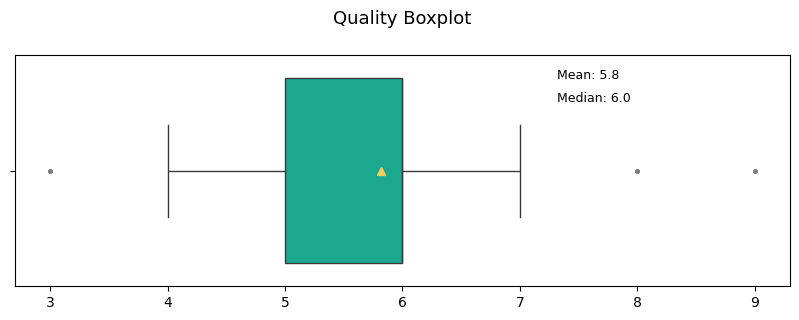

In [41]:
# Let´s create a Boxplot for Quality

plt.figure(figsize=(10, 3))
sns.boxplot( data = df, x = "quality", showmeans=True, color="#04BF9D", 
            meanprops={"markerfacecolor": "#F2CD5E", "markeredgecolor": "#F2CD5E"},
            flierprops={"markersize": 2, "markerfacecolor": "gray", "markeredgecolor": "gray"})
mean_val = df['quality'].mean()
median_val = df['quality'].median()

plt.annotate(f'Mean: {mean_val:.1f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=9)
plt.annotate(f'Median: {median_val:.1f}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=9)

plt.title("Quality Boxplot",y=1.1, fontsize=13)
plt.xlabel("")

# Remove vertical lines
ax = plt.gca()
plt.show()


- The majority of wine quality scores are concentrated between 5 and 6, as indicated by the interquartile range (IQR).
- The mean wine quality score is 5.8, slightly below the median, suggesting a slight negative skew to the left in the distribution.
- There are some outliers with quality scores as low as 3 and as high as 9, indicating exceptional cases in wine quality.
- As previously observed (see Section 2.4), quality does not show significant correlations with any of the numerical variables.

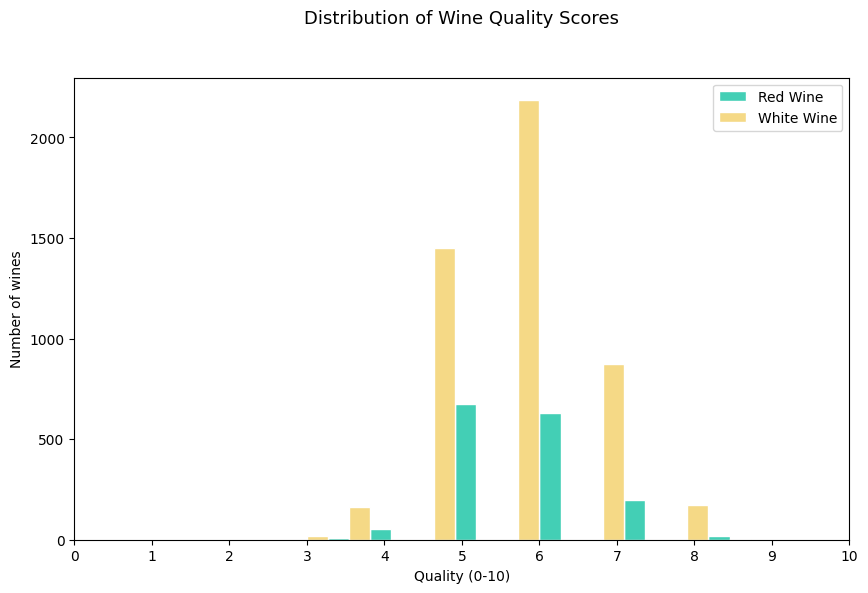

In [42]:
# let´s see the distribution of quality by type of wine

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="quality", hue="Type", multiple="dodge", bins=11, palette=['#F2CD5E','#04BF9D'],edgecolor='white')
plt.xlabel('Quality (0-10)')
plt.ylabel('Number of wines')
plt.title('Distribution of Wine Quality Scores',y=1.1, fontsize=13)
plt.xticks(range(11))
plt.legend(labels=["Red Wine", "White Wine"])
plt.grid(False)
plt.show()

The distribution of the quality variable appears to be normal and similar for both types of wines. 

<div style="background-color: #f2f2f2; padding: 5px;">

#### 4. **Conclusions**

*Predominance of White Wine*:
   - The majority of the dataset consists of white wine samples, which may influence the general interpretation of the analysis results.

*Significant Chemical Differences*:
   - There are substantial differences in physicochemical characteristics between red and white wines, emphasizing the need to analyze these wine types separately for more accurate conclusions.

*Correlation Patterns*:
   - Different correlation patterns are observed between variables in white and red wines.

*Skewness*:
   - Several variables exhibit skewed distributions, especially volatile acidity, residual sugar, and sulfur dioxide. Transforming these variables could normalize their distributions and improve predictive models.

*Quality Distribution*:
   - Wine quality is primarily concentrated between scores of 5 and 6, with a slightly left-skewed distribution. Exceptional cases with very high or low scores exist, but overall, quality does not show a strong correlation with the measured numerical variables.</div>